## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
data = pd.read_csv('dataframe.csv')

In [3]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


## 3. Data Understanding

In [4]:
data.shape

(1697, 2)

In [5]:
data.isna().sum()

input     1
output    1
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

606

In [8]:
data = data.drop_duplicates(ignore_index=True)

In [9]:
data.isna().sum()

input     0
output    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


In [11]:
data.describe()

,input,output
count,1090.000000,1090.000000
mean,8.116185,-27.383628
std,78.769201,68.371895
min,-134.962839,-132.422167
25%,-51.041357,-76.994298
50%,17.462087,-46.300938
75%,76.481078,5.113101
max,134.605775,134.425495


## 4. Data Visualization

### 1. Linearity Test

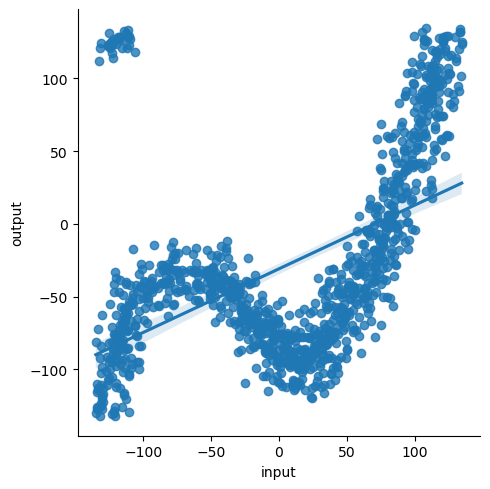

In [12]:
sns.lmplot(x='input', y='output', data=data)
plt.show()

### 2. Normality Test

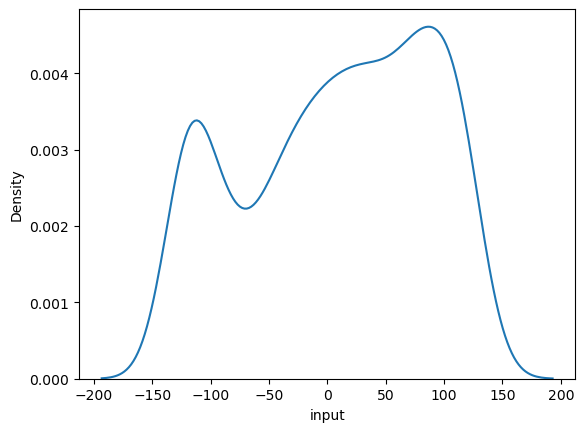

In [13]:
sns.kdeplot(x = 'input', data = data)
plt.show()

### 3. Scatter 

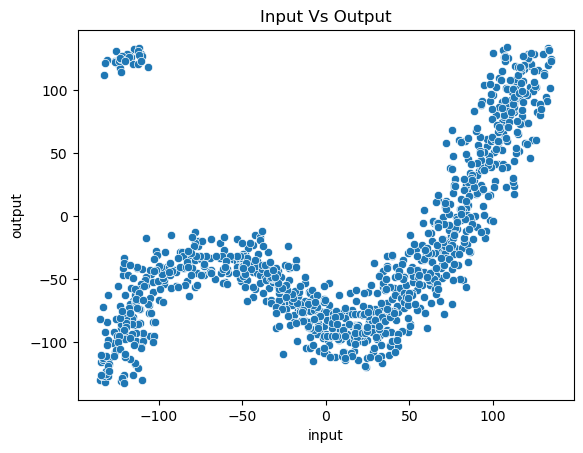

In [14]:
sns.scatterplot(x='input',y='output',data=data)
plt.title('Input Vs Output')
plt.show()

### 4. Heatmap

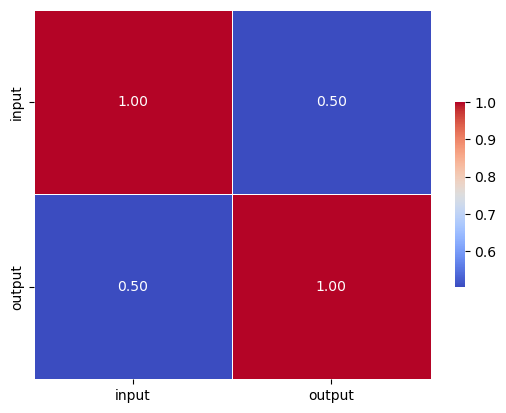

In [15]:
sns.heatmap(data.corr(),annot = True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
plt.show()

### 5. Boxplot

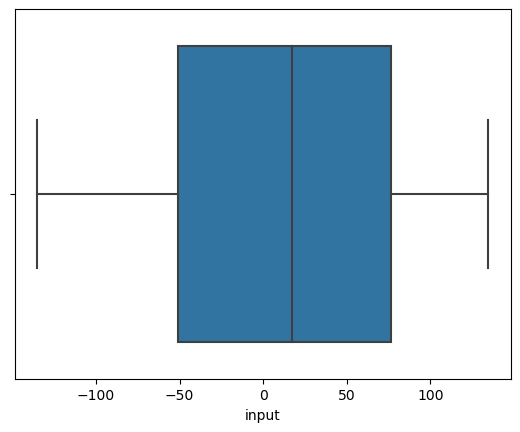

In [16]:
sns.boxplot(data = data, x = 'input')
plt.show()

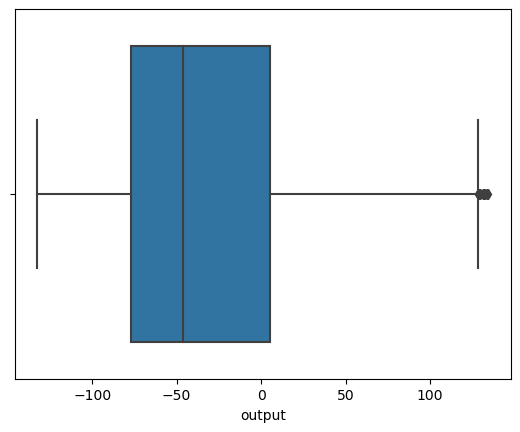

In [17]:
sns.boxplot(data = data, x = 'output')
plt.show()

### Outliers Handeling

In [18]:
Q1 = np.quantile(data.output,0.25)
Q3 = np.quantile(data.output,0.73)
med = np.median(data.output)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = data.output[(data.output <= lower_bound) | (data.output >= upper_bound)]

data1 = data.drop(outliers1.index).reset_index(drop=True)

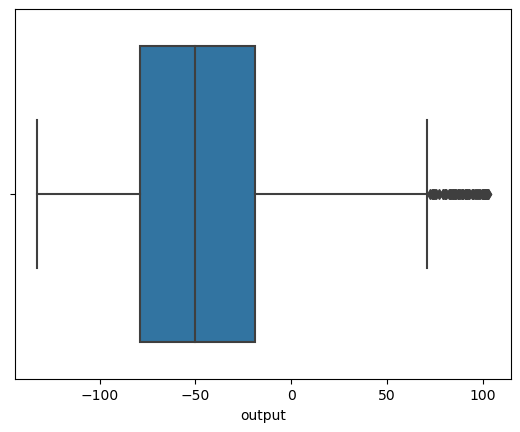

In [19]:
sns.boxplot(data = data1, x = 'output')
plt.show()

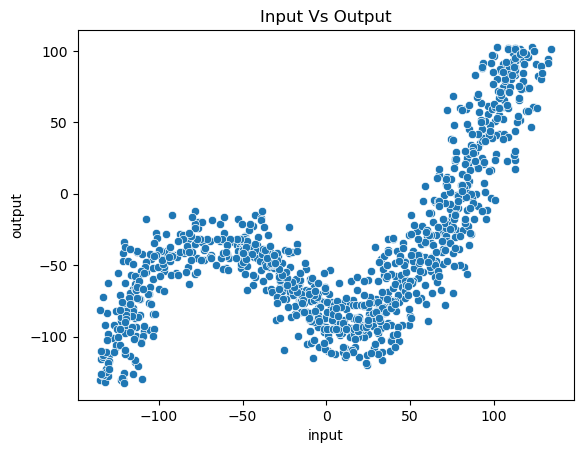

In [20]:
sns.scatterplot(x='input',y='output',data=data1)
plt.title('Input Vs Output')
plt.show()

### Obeservation :
* **We still have outliers but is now ok because if more outliers remove then we loss more data**

## 5. Feature Engineering

In [21]:
data1.describe()

,input,output
count,1004.000000,1004.000000
mean,5.621265,-40.009907
std,74.703008,55.191109
min,-134.962839,-132.422167
25%,-49.728408,-79.062224
50%,14.470979,-50.223405
75%,70.479051,-18.907441
max,133.907372,102.749520


In [22]:
data1.shape

(1004, 2)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
data2 = scaler.fit_transform(data1)
print(data2)

[[4.54575134e-02 7.86694363e-03]
 [4.99550292e-02 1.05592562e-02]
 [1.70415309e-04 9.69646871e-03]
 ...
 [9.19229238e-01 9.92662146e-01]
 [9.30622764e-01 9.77907207e-01]
 [9.38478970e-01 9.86372936e-01]]


## 7. Model Building

In [25]:
data2

array([[4.54575134e-02, 7.86694363e-03],
       [4.99550292e-02, 1.05592562e-02],
       [1.70415309e-04, 9.69646871e-03],
       ...,
       [9.19229238e-01, 9.92662146e-01],
       [9.30622764e-01, 9.77907207e-01],
       [9.38478970e-01, 9.86372936e-01]])

### 7.1 Train Test Split

In [26]:
X =  data1.drop('input', axis = 1)
y =  data1['output']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

### 7.2 Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_train = linear.predict(X_train)

print("Training Accuracy = ", linear.score(X_train, y_pred_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Training Accuracy =  1.0
Test Accuracy     =  1.0


In [29]:
print('R2 Score :',r2_score((y_test), (linear.predict(X_test))))
print('MSE      :',np.sqrt(mean_squared_error((y_test), (linear.predict(X_test)))))
print('MAE      :',mean_absolute_error((y_test), (linear.predict(X_test))))

R2 Score : 1.0
MSE      : 0.0
MAE      : 0.0


### 7.3 Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)

print("Training Accuracy = ", dt.score(X_train, y_pred_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Training Accuracy =  1.0
Test Accuracy     =  0.9999873351422025


In [31]:
print('R2 Score :',r2_score((y_test), (dt.predict(X_test))))
print('MSE      :',np.sqrt(mean_squared_error((y_test), (dt.predict(X_test)))))
print('MAE      :',mean_absolute_error((y_test), (dt.predict(X_test))))

R2 Score : 0.9999873351422025
MSE      : 0.2010298974186422
MAE      : 0.11765957710447747


### 7.4 Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train);

print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Training Accuracy =  0.9997340741472173
Test Accuracy     =  0.999710959807102


### 7.5 Random Search Hyperparameter Grid

In [33]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator = rf,
                              param_grid = {'criterion':['mse','mae'],'max_depth':[2,3,4,5,6]},
                              cv=5)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'mse', 'max_depth': 6}
0.9997911498453181


In [34]:
print('R2 Score :',r2_score((y_test), (rf.predict(X_test))))
print('MSE      :',np.sqrt(mean_squared_error((y_test), (rf.predict(X_test)))))
print('MAE      :',mean_absolute_error((y_test), (rf.predict(X_test))))

R2 Score : 0.999710959807102
MSE      : 0.9603722692674292
MAE      : 0.7293099314671514


## Obeservaion :
### 1. We select the final model - Linear Regression.
### 2. We got 100 % Model Accuracy.

## 8. Model Evaluation

In [35]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Error    : {:0.4f} Degrees'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))  
    return accuracy

In [36]:
evaluate(linear, X_train, y_train)

Model Performance
Error    : 0.0000 Degrees
Accuracy : 100.00 %


100.0

In [37]:
evaluate(linear, X_test, y_test)

Model Performance
Error    : 0.0000 Degrees
Accuracy : 100.00 %


100.0

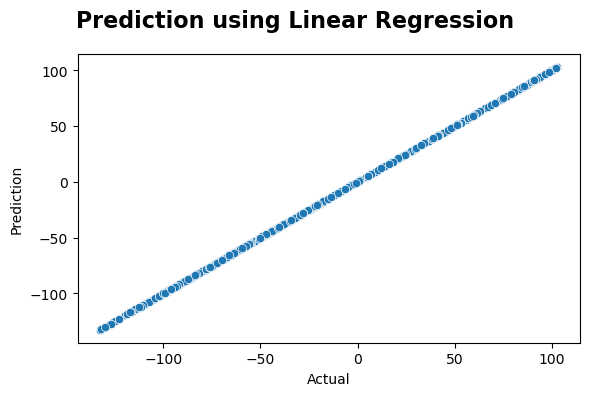

In [40]:
fig = plt.figure(figsize=(6,4))

sns.scatterplot(x=y_train, y=y_pred_train)
fig.suptitle('Prediction using Linear Regression', fontsize= 16 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")
fig.tight_layout()
plt.show()

### 1. Linear Regression is best model with compare to Decision Tree and Random Forest
### 2. Linear Regression Accuracy - 100 %
### 3. Decision Tree Accuracy - 99.9 %
### 4. Random Forest Accuracy - 99.9 %

# The End !!!